## 1. Organizing and Loading the Data

a. Collect and Inspect the Data

	•	Collect Files: Place all CSV files in a specific folder for easy access.
	•	Preview Files: Load a few files individually to inspect the structure. Check for:
	•	Common columns (e.g., product name, reviews, ratings, price).
	•	Unique columns or inconsistencies in data format.

b. Merge the Data

	•	If the files share a similar structure, you can merge them into a single DataFrame for easy processing.

In [193]:
#import Libraries
import os
import pandas as pd
import numpy as np

In [194]:
folder_path = "amazon_data"

# Reading and merging all CSV files
csv_files = [i for i in os.listdir(folder_path) if i.endswith('.csv')]
csv_files

['Suitcases and Trolley Bags.csv',
 'Amazon Fashion.csv',
 'Kitchen Storage and Containers.csv',
 'Coffee Tea and Beverages.csv',
 'Running.csv',
 'The Designer Boutique.csv',
 'Kids Watches.csv',
 'Fashion Sandals.csv',
 'Indian Language Books.csv',
 'Sportswear.csv',
 'Clothing.csv',
 'Innerwear.csv',
 'Casual Shoes.csv',
 'All Sports Fitness and Outdoors.csv',
 'Cardio Equipment.csv',
 'Gaming Accessories.csv',
 'Rucksacks.csv',
 'Car Accessories.csv',
 'Sunglasses.csv',
 'Motorbike Accessories and Parts.csv',
 'All Video Games.csv',
 'Shirts.csv',
 'Furniture.csv',
 'School Bags.csv',
 'Refrigerators.csv',
 'Ethnic Wear.csv',
 'All Electronics.csv',
 'Sports Shoes.csv',
 'Yoga.csv',
 'All Grocery and Gourmet Foods.csv',
 'Camera Accessories.csv',
 'Kids Fashion.csv',
 'Cycling.csv',
 'Luxury Beauty.csv',
 'Gold and Diamond Jewellery.csv',
 'Gaming Consoles.csv',
 'Kids Shoes.csv',
 'All Exercise and Fitness.csv',
 'Janitorial and Sanitation Supplies.csv',
 'Lab and Scientific.csv',

In [195]:
dataframes = []
for i in csv_files:
    df = pd.read_csv(os.path.join(folder_path, i))
    dataframes.append(df)
    
# Merge all DataFrames into one
merge_df = pd.concat(dataframes,ignore_index = False)

In [196]:
merge_df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Skybags Treble-FIFA 68cm Printed Polycarbonate...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71C5GfgxW2...,https://www.amazon.in/Skybags-Treble-FIFA-Prin...,4.5,2,"₹7,250","₹14,500",NaN
1,Tommy Hilfiger Plastic Hard 66 cms Luggage (89...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41lIioNQ3N...,https://www.amazon.in/Tommy-Hilfiger-Luggage-8...,3.6,70,"₹6,399","₹7,999",NaN
2,Samsonite Polyester Hard 68 Cms Luggage- Suitc...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71XSVc5fxg...,https://www.amazon.in/Samsonite-Polyester-Lugg...,4.0,5,"₹12,220","₹18,800",NaN
3,Skybags Polycarbonate Hard 21 Cms Suitcase(_Blue),bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/51euSZMWAn...,https://www.amazon.in/Skybags-Combo-Polycarbon...,4.4,66,"₹6,648","₹10,043.04",NaN
4,Skybags Game-ON FIFA 79cm Printed Polycarbonat...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/710caoNQ4X...,https://www.amazon.in/Skybags-Printed-Polycarb...,4.3,5,"₹6,850","₹17,400",NaN


In [197]:
merge_df.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


## 2. Data Cleaning and Preprocessing

	•	Handle Missing Values: Check for missing values in the dataset. You can choose to fill, drop, or impute missing data depending on the use case.
	•	Data Types Conversion: Ensure columns like dates, prices, and categories are in the correct format.
	•	Outliers Detection: Check for any outliers in numerical columns (e.g., price or ratings).
	•	Deduplication: Ensure there are no duplicate rows or entries.
	•	Feature Engineering: Extract new features from existing columns if necessary, such as sentiment analysis on reviews or categorizing products.


### a. Handle Missing Values

Check for missing values in the dataset. You can choose to fill, drop, or impute missing data depending on the use case.


Understand the Importance of Each Column:

The first step is to determine how critical each column is for your analysis. If a column with missing values is essential, you need to focus on imputing or filling the values. For non-critical columns, you can consider dropping them or filling missing values with placeholders.

Assess the Extent of Missing Data:

Based on the percentage of missing data, you can choose different strategies. Generally:

1. If less than 5% of data is missing, simple imputation (mean, median, or mode) is usually sufficient.

2. For 5%-30% missing data, advanced imputation techniques like K-Nearest Neighbors (KNN) or regression may be considered.

3. If more than 30% is missing, you might want to drop the column if it is non-essential.


In [198]:
# Checking for missing values
missing_values = merge_df.isnull().sum()
missing_values

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
Unnamed: 0        551585
dtype: int64

In [199]:
# Percentage of missing values
missing_percentage = (missing_values/len(merge_df))/100
missing_percentage

name              0.000000
main_category     0.000000
sub_category      0.000000
image             0.000000
link              0.000000
ratings           0.003187
no_of_ratings     0.003187
discount_price    0.001109
actual_price      0.000323
Unnamed: 0        0.005000
dtype: float64

This gives you a sense of the overall missing data in each column. Columns with significant missing data (e.g., > 50%) might require different handling than those with a small amount of missing data.

#### Assess the Extent of Missing Data:
    
Based on the percentage of missing data, you can choose different strategies. Generally:

If less than 5% of data is missing, simple imputation (mean, median, or mode) is usually sufficient.

For 5%-30% missing data, advanced imputation techniques like K-Nearest Neighbors (KNN) or regression may be considered.

If more than 30% is missing, you might want to drop the column if it is non-essential.

In this case, the percentage of missing values is small (all less than 1%). Therefore, simple imputation methods are efficient for handling missing values.


In [200]:
type(missing_values["discount_price"])

numpy.int64

#### Column-by-Column Analysis

1. ratings (0.3187% missing)

Recommendation: Since the missing percentage is very small and ratings are numerical, fill missing values using the mean. This is appropriate for continuous numerical data in large datasets when the percentage of missing values is low.

In [201]:
# Fill missing values in 'ratings' with the mean
merge_df['ratings'] = pd.to_numeric(merge_df['ratings'], errors='coerce')
merge_df['ratings'].fillna(merge_df['ratings'].mean(), inplace=True)

2. no_of_ratings (0.3187% missing)

Recommendation: Since the percentage of missing values is low and no_of_ratings is count data, filling missing values with the median is more appropriate than the mean because count data can often be skewed.

In [202]:
merge_df['no_of_ratings'] = pd.to_numeric(merge_df['no_of_ratings'], errors = 'coerce')
merge_df['no_of_ratings'].fillna(merge_df['no_of_ratings'].mean(), inplace = True)

3. discount_price (0.1109% missing)

Recommendation: Since the missing percentage is low and it's a price field, missing values can be filled with 0, which indicates no discount. This is a common approach in e-commerce datasets when discount prices are missing.

In [203]:
# Clean and convert 'discount_price', then fill missing values with 0
merge_df['discount_price'] = merge_df['discount_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
merge_df['discount_price'].fillna(0, inplace=True)

4. actual_price (0.0323% missing)

Recommendation: For this critical column, the best approach is to fill missing values with the mean or median. Since the percentage of missing data is small and it's price data, the mean should suffice unless there are extreme outliers.

In [204]:
# Clean and convert 'actual_price', then fill missing values with the mean
merge_df['actual_price'] = merge_df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
merge_df['actual_price'].fillna(merge_df['actual_price'].mean(), inplace=True)

5. Unnamed: 0 (0.5% missing)

Recommendation: This column has a higher percentage of missing data, but it appears to be unnecessary. Since it serves no real purpose (likely an index), you should drop this column.

In [205]:
# Drop 'Unnamed: 0' column
merge_df.drop(columns=['Unnamed: 0'], inplace=True)

In [206]:
missing_values = merge_df.isnull().sum()
missing_values

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

### b. Data Types Conversions

Ensure columns like dates, prices, and categories are in the correct format.

Steps for Data Type Conversion:

Numerical Columns (Ensure ratings, no_of_ratings, discount_price, and actual_price are in the correct numeric format)

Categorical Columns (Ensure main_category, sub_category, and any other categorical fields are correctly categorized)

Date Columns (If applicable, convert any date-related fields to datetime format)

URL Columns (Optional: For fields like link and image, it's generally fine to keep them as strings, but you can ensure they are properly stored)

In [207]:
print(merge_df.dtypes)

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object


#### 1. Numerical Columns (incase but I already have the correct data types)

Make sure that the numerical columns (ratings, no_of_ratings, discount_price, actual_price) are properly stored as numeric data types (either int64 or float64). Since you've already cleaned and converted the price columns, you just need to confirm their data types.

In [208]:
# Convert numerical columns to float if they are not already in the correct format
merge_df['ratings'] = pd.to_numeric(merge_df['ratings'], errors='coerce')
merge_df['no_of_ratings'] = pd.to_numeric(merge_df['no_of_ratings'], errors='coerce')
merge_df['discount_price'] = pd.to_numeric(merge_df['discount_price'], errors='coerce')
merge_df['actual_price'] = pd.to_numeric(merge_df['actual_price'], errors='coerce')

####  2. Categorical Columns (incase but I already have the correct data types)

Columns such as main_category, sub_category, and possibly name are categorical fields. It's a good practice to convert these columns to category type, which reduces memory usage and improves performance, especially with large datasets like yours.

In [209]:
# Convert categorical columns to 'category' dtype
merge_df['main_category'] = merge_df['main_category'].astype('category')
merge_df['sub_category'] = merge_df['sub_category'].astype('category')
merge_df['name'] = merge_df['name'].astype('category')  # If 'name' is treated as a category

####  3.  Date Columns (If applicable) (incase but I already have the correct data types)

If your dataset contains any date columns (e.g., review_date, sale_date, etc.), you should convert them to datetime format for easier manipulation during analysis (such as time series analysis or filtering).

If you don’t have a date column in your dataset currently, you can skip this step. Otherwise, use the following code to convert date columns.

In [210]:
# Example for converting a date column (if you have one)
#merge_df['date_column'] = pd.to_datetime(merge_df['date_column'], errors='coerce')

#### 4. URL Columns (Image, Link) (incase but I already have the correct data types)

For columns like image and link, you don't need to change their format. However, it's good to make sure they are treated as string or object types.

In [211]:
# Ensure that URL columns are stored as strings (which is default)
print(merge_df['link'].dtype)  # Should return 'object' (which stores strings in pandas)
print(merge_df['image'].dtype)  # Should return 'object'

object
object


#### 5. Final Check: Verify Data Types

Once you have converted all columns to their appropriate types, it’s important to recheck the data types to ensure that everything is in the right format.

In [212]:
print(merge_df.dtypes)

name              category
main_category     category
sub_category      category
image               object
link                object
ratings            float64
no_of_ratings      float64
discount_price     float64
actual_price       float64
dtype: object


### C. Outliers Detection

##### 1. Understanding the Nature of Outliers

Outliers are data points that are significantly different from the majority of data. They can arise due to errors, unusual events, or genuinely rare cases.

For Continuous Variables (e.g., discount_price, actual_price): Outliers are typically extreme values.

For Discrete Variables (e.g., no_of_ratings): Outliers can be unusually high or low counts.

For ratings: Given a typical rating scale (1–5), outliers would be values far from the expected range.


#####  2. Statistical Approaches to Detect Outliers


Here’s a breakdown of what to expect and how to detect outliers for your specific columns:

IQR Method: Useful for detecting extreme values (especially in no_of_ratings, discount_price, and actual_price).

Z-Score Method: Best for normally distributed data or when identifying extreme deviations from the mean (use for ratings and actual_price).

Visualization: Use box plots and scatter plots for quick visual identification of outliers.

Handling: Based on the nature of the outliers, you can either remove them, cap them, or apply transformations.

#### a. Box Plot Method (IQR - Interquartile Range)

Box plots can highlight outliers by showing values beyond the "whiskers" of the plot. The Interquartile Range (IQR) method identifies outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Q1: 25th percentile (lower quartile).

Q3: 75th percentile (upper quartile).

IQR: Difference between Q1 and Q3.


#### discount_price

In [213]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in 'discount_price'
discount_price_outliers = detect_outliers_iqr(merge_df, 'discount_price')
discount_price_outliers


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Skybags Treble-FIFA 68cm Printed Polycarbonate...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71C5GfgxW2...,https://www.amazon.in/Skybags-Treble-FIFA-Prin...,4.5,2.00000,7250.0,14500.00
1,Tommy Hilfiger Plastic Hard 66 cms Luggage (89...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41lIioNQ3N...,https://www.amazon.in/Tommy-Hilfiger-Luggage-8...,3.6,70.00000,6399.0,7999.00
2,Samsonite Polyester Hard 68 Cms Luggage- Suitc...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71XSVc5fxg...,https://www.amazon.in/Samsonite-Polyester-Lugg...,4.0,5.00000,12220.0,18800.00
3,Skybags Polycarbonate Hard 21 Cms Suitcase(_Blue),bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/51euSZMWAn...,https://www.amazon.in/Skybags-Combo-Polycarbon...,4.4,66.00000,6648.0,10043.04
4,Skybags Game-ON FIFA 79cm Printed Polycarbonat...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/710caoNQ4X...,https://www.amazon.in/Skybags-Printed-Polycarb...,4.3,5.00000,6850.0,17400.00
...,...,...,...,...,...,...,...,...,...
1006,Finish Powerball All In 1 Dishwasher Tablets 7...,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/81niWVThre...,https://www.amazon.in/Finish-Powerball-Dishwas...,4.7,68.00000,2995.0,5998.00
1029,EARTH INNOVATION™ Ultrasonic/Ultrasound Rat an...,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/71HRXFHnrM...,https://www.amazon.in/EARTH-INNOVATIONTM-Ultra...,3.0,18.00000,3499.0,7999.00
1038,Weiman Stainless Steel Cleaner Wipes [2 Pack] ...,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/71vGBssiCf...,https://www.amazon.in/Weiman-Stainless-Fingerp...,4.7,88.90881,4505.0,6439.00
1049,Portable Sanitizing Fogging Machine Air Purifi...,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/31sF8q5922...,https://www.amazon.in/Portable-Sanitizing-Puri...,3.1,28.00000,2949.0,9999.00


#### Considerations for Handling Outliers in discount_price

1. Contextual Understanding of the Data

What is the purpose of the analysis?

If you are analyzing average discount trends, extreme values could skew the results, especially if they are not typical.

If you are analyzing a wide range of products, including luxury items, it's possible that some high discounts are legitimate, and you might want to keep them.

Business Context of Discounts:

Are there any products that could naturally have high discounts (e.g., luxury items or clearance sales)?

If high discounts are reasonable (e.g., seasonal sales or promotional offers), those outliers might be valid.

**Decide How to Handle the Outliers**
Based on the nature of the outliers, you have the following options:

**Option 1: Remove Outliers:** If the outliers are erroneous or irrelevant, you can remove them from the dataset. This is useful when the outliers distort the overall analysis.

**Option 2: Cap the Outliers:** If the outliers are extreme but valid, you can cap them at a certain percentile (e.g., 1st and 99th percentile). This approach reduces the influence of extreme values without completely removing them.

**Option 3: Keep the Outliers:** If the outliers are genuine and part of the expected data distribution (e.g., certain luxury items with very high or low discounts), you can choose to keep them.


In [214]:
# Summary statistics before removing/capping outliers
print(merge_df['discount_price'].describe())

# Compare mean and median
mean_price = merge_df['discount_price'].mean()
median_price = merge_df['discount_price'].median()
print(f"Mean: {mean_price}, Median: {median_price}")


count    1.103170e+06
mean     2.332289e+03
std      8.956350e+03
min      0.000000e+00
25%      2.990000e+02
50%      5.900000e+02
75%      1.249000e+03
max      1.249990e+06
Name: discount_price, dtype: float64
Mean: 2332.2891974219756, Median: 590.0


**Key Insights:**

**Mean vs. Median:**

The mean is significantly higher than the median. This suggests that there are high outliers pulling the mean upward.

A median of 590 compared to a mean of 2332 indicates a right-skewed distribution where most of the data is concentrated around lower values, with a few extremely high values (likely the outliers).

**Standard Deviation (std):**

The standard deviation is very high (8956), which further suggests that there are values significantly higher than the mean, which are influencing the overall distribution.

**Min, Max, and Percentiles:**

The min value is 0, and the max is 1,249,990, indicating a huge range of values.

25% of the values are below 299, and 75% of the values are below 1249, while the maximum value is 1,249,990, which is drastically higher than the rest of the data.

**Scenario Analysis:**

Most of the data is concentrated between 299 and 1249, with a few extreme values reaching up to 1.25 million.

Given the large gap between the median (590) and the maximum value (1,249,990), the outliers are likely extreme but rare, and may not represent typical discount prices.

**Recommended Approach: Cap the Outliers**

Given that the outliers are skewing the mean significantly but may still represent valid data points, a good approach would be to cap the outliers. This way, you retain most of the data but reduce the impact of extreme values on your analysis.

**Steps to Cap the Outliers:**

**Cap at the 1st and 99th Percentiles:** This is a common approach for handling outliers when you don’t want to lose data but want to mitigate the effect of extreme values.

**Ensure the capped values still represent real-world phenomena:** The 99th percentile should still include most realistic values, but you’ll cap anything beyond that.

In [215]:
# Calculate the 1st and 99th percentiles
lower_cap = merge_df['discount_price'].quantile(0.01)
upper_cap = merge_df['discount_price'].quantile(0.99)

# Cap the values at these percentiles
merge_df['discount_price'] = np.where(merge_df['discount_price'] < lower_cap, lower_cap, merge_df['discount_price'])
merge_df['discount_price'] = np.where(merge_df['discount_price'] > upper_cap, upper_cap, merge_df['discount_price'])

# Check summary statistics after capping
merge_df['discount_price'].describe()


count    1.103170e+06
mean     2.023481e+03
std      5.394999e+03
min      0.000000e+00
25%      2.990000e+02
50%      5.900000e+02
75%      1.249000e+03
max      3.789000e+04
Name: discount_price, dtype: float64

#### b. Z-Score Method (Standard Deviation Method)

The Z-Score method identifies outliers by measuring how far a data point is from the mean in terms of standard deviations. Data points with a Z-score above a certain threshold (commonly 3) are considered outliers.

In [216]:
from scipy import stats

# Z-Score method for detecting outliers
def detect_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > 3]
    return outliers

# Detect outliers in 'actual_price'
actual_price_outliers = detect_outliers_zscore(merge_df, 'actual_price')
actual_price_outliers


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
351,Clovia Women's Activewear Ankle Length Printed...,sports & fitness,Running,https://m.media-amazon.com/images/I/61ssMT12tF...,https://www.amazon.in/Clovia-Womens-Activewear...,3.2,4.0,688.0,6.108299e+07
853,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09
194625,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09
402750,Clovia Women's Activewear Ankle Length Printed...,sports & fitness,Running,https://m.media-amazon.com/images/I/61ssMT12tF...,https://www.amazon.in/Clovia-Womens-Activewear...,3.2,4.0,688.0,6.108299e+07


In [217]:
actual_price_outliers.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,4.00000,4.000000,4.000000,4.000000e+00
mean,2.60000,2.500000,638.500000,4.980541e+09
std,0.69282,1.732051,57.157677,5.680501e+09
min,2.00000,1.000000,589.000000,6.108299e+07
25%,2.00000,1.000000,589.000000,6.108299e+07
50%,2.60000,2.500000,638.500000,4.980541e+09
75%,3.20000,4.000000,688.000000,9.900000e+09
max,3.20000,4.000000,688.000000,9.900000e+09


**Remove the Extreme Z-score Outliers:**

The values flagged by Z-score (such as 6.1 million and 9.9 billion) are likely to be data entry errors or unrealistic outliers. You can remove them directly from the dataset.

In [218]:
# Remove the extreme Z-score outliers (values flagged by Z-score)
merge_df = merge_df[~merge_df.index.isin(actual_price_outliers.index)]

**Cap the Remaining IQR Outliers:** After removing the most extreme outliers using Z-score, you can apply capping to handle the less extreme outliers detected by the IQR method.

In [219]:
# Cap the values at the 1st and 99th percentiles using .loc to avoid the warning
lower_cap = merge_df['actual_price'].quantile(0.01)
upper_cap = merge_df['actual_price'].quantile(0.99)

# Apply the cap using .loc
merge_df.loc[merge_df['actual_price'] < lower_cap, 'actual_price'] = lower_cap
merge_df.loc[merge_df['actual_price'] > upper_cap, 'actual_price'] = upper_cap

# Check the results
merge_df['actual_price'].describe()


count    1.102962e+06
mean     4.680181e+03
std      8.707067e+03
min      2.100000e+02
25%      9.990000e+02
50%      1.599000e+03
75%      3.499000e+03
max      5.421834e+04
Name: actual_price, dtype: float64

#### ratings Z-score

In [220]:
# Detect outliers in 'ratings'
ratings_outliers = detect_outliers_zscore(merge_df, 'ratings')
ratings_outliers

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
31,Cortina Eco Friendly Spandex 55 cm (20 Inch) a...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/717gr2Ng6F...,https://www.amazon.in/Cortina-Friendly-Protect...,1.0,1.0,1499.0,2998.0
61,RELIANCE Polyester Printed (28' Inch) Large Pr...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RELIANCE-Polyester-Print...,1.0,1.0,599.0,1198.0
68,"MyViradi Luggage Handle for VIP Safari, Amrica...",bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MyViradi-Luggage-Turiste...,1.0,2.0,445.0,999.0
96,Skyline Expandable Polyester Soft Case Trolley...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/81CNde5jY6...,https://www.amazon.in/Skyline-Expandable-Polye...,1.0,1.0,1049.0,3099.0
99,Varahry Foldable Shopping Trolley Carry Bag fo...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41NPeVrl7t...,https://www.amazon.in/Varahry-Shopping-Bag-Veg...,1.0,1.0,399.0,699.0
...,...,...,...,...,...,...,...,...,...
969,Imvelo 2 Ply Facial Tissues Box | Car Pack - P...,beauty & health,Household Supplies,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Imvelo-Facial-tissues-Gu...,1.0,1.0,345.0,390.0
988,Electronic Insect & Mosquito Killer with Night...,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/51ZK+2B3tK...,https://www.amazon.in/Electronic-Mosquito-Radi...,1.9,5.0,129.0,299.0
1072,CLICKFLY® Morning Fresh Fabric Conditioner and...,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/51oF7cfqZq...,https://www.amazon.in/CLICKFLY%C2%AE-Morning-F...,1.0,1.0,249.0,699.0
1075,"Mitrin Urinal Toilet Screen, (Pack of 20), Uri...",beauty & health,Household Supplies,https://m.media-amazon.com/images/I/61DfhieFtR...,https://www.amazon.in/Mitrin-Urinal-Fragrance-...,1.8,3.0,699.0,1299.0


In this case, I would recommend keeping the outliers in the ratings column because:

Ratings like 1.0 or 1.2 are likely to be valid and reflect customer feedback.
Removing or capping them could result in a loss of valuable information regarding customer dissatisfaction.

#### no_of_ratings: Use IQR 

In [221]:
# Detect outliers in 'no_of_ratings'
no_of_ratings_outliers = detect_outliers_iqr(merge_df, 'no_of_ratings')
no_of_ratings_outliers

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
20,TRUMPKIN / Small Size/Cabin-Luggage/Polyester/...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/61ALbO5pEB...,https://www.amazon.in/Polyster-Softside-Small-...,4.0,213.0,1333.00,2100.0
56,Nasher Miles Lombard Hard-Side Cabin Luggage|G...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Nasher-Miles-Lombard-Gre...,4.2,321.0,3299.00,3400.0
74,NOVEX Canyon Check-in Size Soft Sided Polyeste...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NOVEX-Polyester-Luggage-...,4.0,308.0,3299.00,8999.0
83,AmazonBasics Pyramid Hardside Spinner Luggage ...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/AmazonBasics-Pyramid-Lug...,4.6,223.0,2141.68,7500.0
88,MOKOBARA The Set of Polycarbonate Hardsided Lu...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MOKOBARA-Polycarbonate-H...,4.3,359.0,18499.00,23999.0
...,...,...,...,...,...,...,...,...,...
861,Glade Solid Gel Lavender - 150 g,beauty & health,Household Supplies,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Glade-Solid-Gel-Lavender...,4.3,232.0,229.00,399.0
925,Mortein Insta5 Refill - 35 ml (Pack of 6),beauty & health,Household Supplies,https://m.media-amazon.com/images/I/71Ss5pk4wN...,https://www.amazon.in/Mortein-Insta5-Refill-35...,4.1,355.0,418.00,450.0
957,Harpic Active Fresh Mountain Pine 750ml,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/51bHRTteCL...,https://www.amazon.in/Harpic-Act-Gel-Mountain-...,4.5,242.0,329.00,499.0
1003,ECO365 Bamboo Toothbrush (Pack of 2) & Steel S...,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/61bTlz+J0v...,https://www.amazon.in/ECO365-Toothbrush-Charco...,4.1,287.0,322.00,470.0


Since no_of_ratings is count data and high counts could represent popular or highly rated products, I recommend capping the outliers instead of removing them. This way, you can retain most of the data while reducing the influence of extreme values.

In [222]:
# Cap outliers in 'no_of_ratings' at the 1st and 99th percentiles
lower_cap = merge_df['no_of_ratings'].quantile(0.01)
upper_cap = merge_df['no_of_ratings'].quantile(0.99)

# Apply the cap using np.where
merge_df.loc[merge_df['no_of_ratings'] < lower_cap, 'no_of_ratings'] = lower_cap
merge_df.loc[merge_df['no_of_ratings'] > upper_cap, 'no_of_ratings'] = upper_cap

# Check the result after capping
merge_df['no_of_ratings'].describe()


count    1.102962e+06
mean     8.784355e+01
std      1.287012e+02
min      1.000000e+00
25%      9.000000e+00
50%      8.890881e+01
75%      8.890881e+01
max      7.740000e+02
Name: no_of_ratings, dtype: float64

##### 3. Visualization for Outliers Detection

Visualization methods can help you understand the data distribution and locate outliers visually.

#### a. Box Plot

Box plots display the distribution of data and highlight outliers beyond the whiskers.

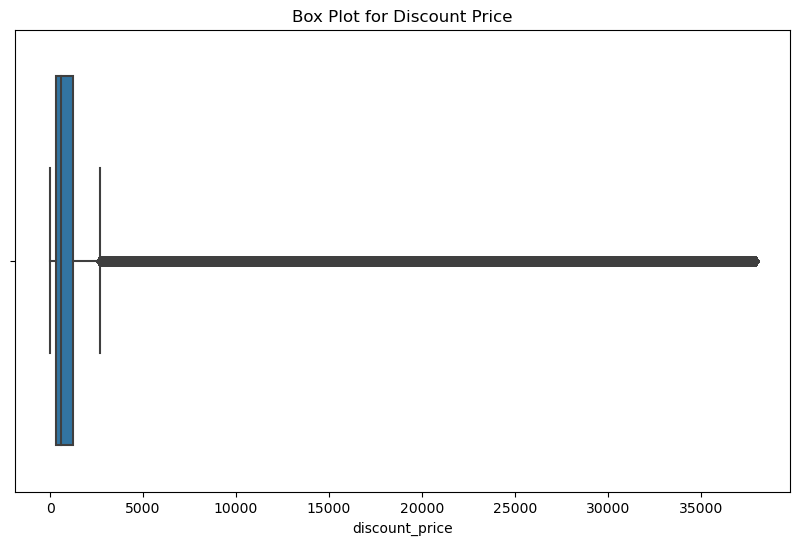

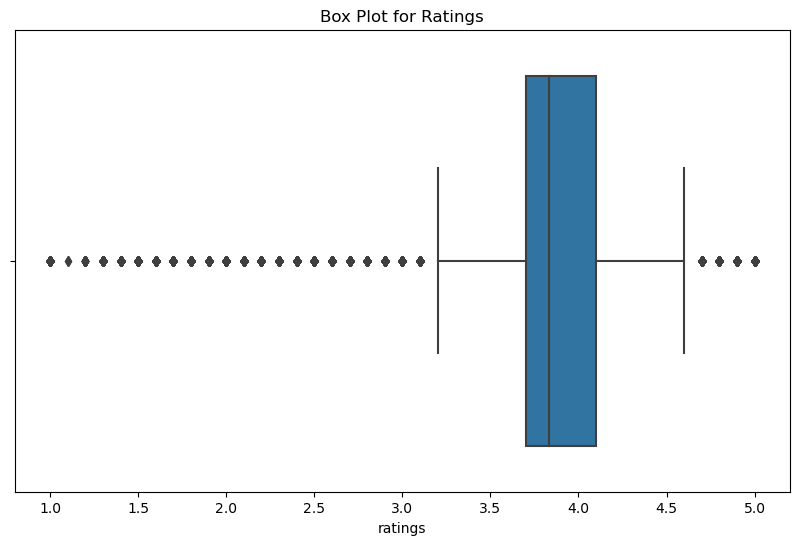

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'discount_price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=merge_df['discount_price'])
plt.title("Box Plot for Discount Price")
plt.show()

# Box plot for 'ratings'
plt.figure(figsize=(10, 6))
sns.boxplot(x=merge_df['ratings'])
plt.title("Box Plot for Ratings")
plt.show()


#### b. Scatter Plot
Scatter plots can be used to visually inspect relationships between variables and spot outliers, especially in large datasets.

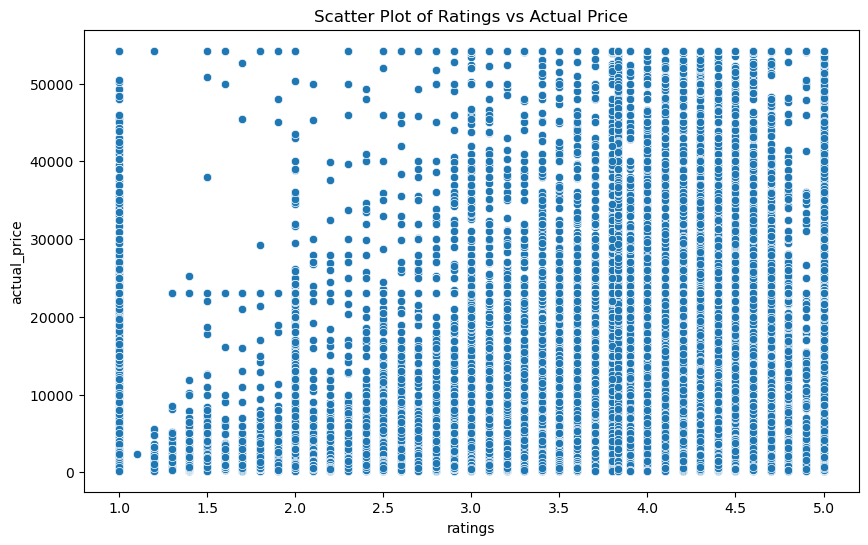

In [224]:
# Scatter plot for 'ratings' vs 'actual_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merge_df['ratings'], y=merge_df['actual_price'])
plt.title("Scatter Plot of Ratings vs Actual Price")
plt.show()


### e. Feature Engineering:

1. Price-Related Feature Engineering

a. Discount Percentage:

You can create a feature that represents the discount percentage based on discount_price and actual_price.

In [225]:
# Create a feature for discount percentage
merge_df.loc[:, 'discount_percentage'] = ((merge_df['actual_price'] - merge_df['discount_price']) / merge_df['actual_price']) * 100

b. Price Difference:
The difference between the actual price and the discount price can also be a useful feature.

In [226]:
# Create a feature for the price difference
merge_df.loc[:, 'price_difference'] = merge_df['actual_price'] - merge_df['discount_price']

2. Ratings-Related Feature Engineering

a. Weighted Ratings:
Create a weighted rating that combines ratings with no_of_ratings. This could be useful to prioritize items with a higher number of ratings.

In [227]:

merge_df = merge_df.copy()

# Now add the new column using .loc[]
merge_df.loc[:, 'weighted_rating'] = merge_df['ratings'] * merge_df['no_of_ratings']


b. Rating Bins:
You can categorize ratings into bins (e.g., low, medium, high) to make them more interpretable or for use in models that prefer categorical data.

In [228]:
# Bin the ratings into categories
merge_df['rating_category'] = pd.cut(merge_df['ratings'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])


3. Categorical Feature Engineering

a. One-Hot Encoding for main_category and sub_category:

Convert these categorical columns into numerical format using one-hot encoding.

In [229]:
# One-hot encode 'main_category' and 'sub_category'
#merge_df = pd.get_dummies(merge_df, columns=['main_category', 'sub_category'], drop_first=True)


4. Feature Engineering Based on Product Name (name)

a. Text Length:

Create a feature representing the length of the product name, which might give insights into product complexity or information density.

In [230]:
# Feature for length of the product name
merge_df['name_length'] = merge_df['name'].apply(len)


b. Keyword Features:

You could extract specific keywords or terms from the name column that are indicative of certain product categories or characteristics. For instance, if certain words like "Premium", "Limited Edition", etc., appear, you could flag them.

In [231]:
# Extract keywords like 'Premium' from the name and create a binary flag
merge_df['is_premium'] = merge_df['name'].apply(lambda x: 1 if 'premium' in x.lower() else 0)


5. Interactions Between Features

a. Interaction Between Ratings and Discount:

You could create an interaction feature that captures the relationship between discounts and ratings. For instance, highly rated products with large discounts might be especially valuable.

In [232]:
# Interaction between discount percentage and ratings
merge_df['discount_rating_interaction'] = merge_df['discount_percentage'] * merge_df['ratings']


b. Interaction Between Price and Number of Ratings:

Highly rated products with many reviews might be more attractive than those with fewer reviews, even if their ratings are slightly lower. You can capture this in an interaction feature.

In [233]:
# Interaction between actual price and number of ratings
merge_df['price_rating_interaction'] = merge_df['actual_price'] * merge_df['no_of_ratings']


In [236]:
merge_df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,price_difference,weighted_rating,rating_category,name_length,is_premium,discount_rating_interaction,price_rating_interaction
0,Skybags Treble-FIFA 68cm Printed Polycarbonate...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71C5GfgxW2...,https://www.amazon.in/Skybags-Treble-FIFA-Prin...,4.500000,2.00000,7250.0,14500.00,50.000000,7250.00,9.000000,High,118,0,225.000000,29000.000000
1,Tommy Hilfiger Plastic Hard 66 cms Luggage (89...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41lIioNQ3N...,https://www.amazon.in/Tommy-Hilfiger-Luggage-8...,3.600000,70.00000,6399.0,7999.00,20.002500,1600.00,252.000000,Medium,64,0,72.009001,559930.000000
2,Samsonite Polyester Hard 68 Cms Luggage- Suitc...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71XSVc5fxg...,https://www.amazon.in/Samsonite-Polyester-Lugg...,4.000000,5.00000,12220.0,18800.00,35.000000,6580.00,20.000000,Medium,71,0,140.000000,94000.000000
3,Skybags Polycarbonate Hard 21 Cms Suitcase(_Blue),bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/51euSZMWAn...,https://www.amazon.in/Skybags-Combo-Polycarbon...,4.400000,66.00000,6648.0,10043.04,33.804904,3395.04,290.400000,High,49,0,148.741576,662840.640000
4,Skybags Game-ON FIFA 79cm Printed Polycarbonat...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/710caoNQ4X...,https://www.amazon.in/Skybags-Printed-Polycarb...,4.300000,5.00000,6850.0,17400.00,60.632184,10550.00,21.500000,High,102,0,260.718391,87000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,"Zimmer Aufraumen Tap, Faucet Sink & Shower Cle...",beauty & health,Household Supplies,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Zimmer-Aufraumen-Faucet-...,3.832311,88.90881,449.0,999.00,55.055055,550.00,340.726238,Medium,106,0,210.988110,88819.901351
1100,SHREE HANS FASHION | Stainless Steel Straws wi...,beauty & health,Household Supplies,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SHREE-HANS-FASHION-Dishw...,3.832311,88.90881,199.0,499.00,60.120240,300.00,340.726238,Medium,125,0,230.399477,44365.496270
1101,Mridaya Biotic Pure and Organic Citric Acid Cr...,beauty & health,Household Supplies,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mridaya-Biotic-Crystals-...,3.000000,7.00000,179.0,459.00,61.002179,280.00,21.000000,Medium,125,0,183.006536,3213.000000
1102,Mush Ultra Soft & Super Absorbent Bamboo Hoode...,beauty & health,Household Supplies,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mush-Ultra-Absorbent-Bam...,4.200000,8.00000,799.0,1499.00,46.697799,700.00,33.600000,High,78,0,196.130754,11992.000000


In [237]:
merge_df.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,price_difference,weighted_rating,name_length,is_premium,discount_rating_interaction,price_rating_interaction
count,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06,1.102962e+06
mean,3.832300e+00,8.784355e+01,2.023567e+03,4.680181e+03,5.508254e+01,2.656614e+03,3.434937e+02,7.927260e+01,1.142560e-02,2.107108e+02,4.316036e+05
std,6.189142e-01,1.287012e+02,5.395206e+03,8.707067e+03,2.547877e+01,5.410635e+03,5.159002e+02,3.455339e+01,1.062782e-01,1.051971e+02,1.398581e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,2.100000e+02,5.291005e-04,1.000000e-02,1.000000e+00,2.000000e+00,0.000000e+00,1.904762e-03,2.100000e+02
25%,3.700000e+00,9.000000e+00,2.990000e+02,9.990000e+02,3.754693e+01,4.200000e+02,3.330000e+01,5.000000e+01,0.000000e+00,1.383546e+02,1.499500e+04
50%,3.832311e+00,8.890881e+01,5.900000e+02,1.599000e+03,5.495495e+01,8.790000e+02,3.407262e+02,7.600000e+01,0.000000e+00,2.052625e+02,8.846427e+04
75%,4.100000e+00,8.890881e+01,1.249000e+03,3.499000e+03,7.169056e+01,1.976000e+03,3.407262e+02,1.180000e+02,0.000000e+00,2.751376e+02,2.666375e+05
max,5.000000e+00,7.740000e+02,3.789000e+04,5.421834e+04,1.000000e+02,5.421834e+04,3.715200e+03,1.250000e+02,1.000000e+00,5.000000e+02,4.196500e+07


**Key Areas to Focus On:**

Count:

The count for all columns is consistent across the processed dataset (~1.1 million rows). This indicates that no data was accidentally removed during the cleaning process, which is a positive sign.

Mean and Median (50%):

ratings: The mean (3.83) and median (3.83) are very close, which indicates a normal distribution with no major skew. This is a good sign for a balanced ratings dataset.

no_of_ratings: The mean (87.84) is significantly higher than the median (88.91), indicating some skew (likely a few products with very high numbers of ratings). However, since the 25th and 75th percentiles are close to the median, this skew is not extreme.

discount_price and actual_price: The prices show a large variation, which is expected in e-commerce datasets. The distribution looks reasonable, as the mean and median are close for both discount_price and actual_price.

discount_percentage: The mean (55.08%) and median (54.95%) are very close, which suggests a balanced range of discounts.

Standard Deviation (std):

no_of_ratings: The standard deviation is high (128.7) compared to the mean (87.8), indicating the presence of 
outliers (products with many ratings). This is normal in product datasets where some products are more popular.

discount_price and actual_price: The high standard deviation for actual_price and discount_price is expected in retail data, where prices can vary greatly between products.

weighted_rating: The high standard deviation here suggests that there are products with very high ratings and a large number of reviews, which could indicate very popular items.

Min and Max Values:

ratings: The minimum is 1 and the maximum is 5, which makes sense for a typical ratings system.

no_of_ratings: The minimum of 1 and a maximum of 774 shows there are products with a lot of customer engagement, which is expected in large datasets.

discount_price and actual_price: The price distribution shows that you have a variety of products, from very cheap items (as low as $2.10) to expensive ones (~$54,000), which is common in large retail datasets.

discount_percentage: A range from nearly 0% to 100% shows that some products are heavily discounted while others are not.

Feature Engineering Columns:

price_difference: The mean price difference is ~2656, and the max is around ~54,000, which reflects the price variations after discounts.

discount_rating_interaction and price_rating_interaction: The wide range (from very small to large values) suggests that there are products with substantial price differences and significant ratings, which can be useful for further analysis.

**Overall Evaluation:**

**Good Aspects:**

The cleaning process seems effective, as the data appears balanced and consistent.
The mean and median values are close for most columns, suggesting the absence of major skew, which is a good sign.
The engineered features, such as discount_percentage, price_difference, and interaction terms, provide useful insights and add value to the dataset.

**Potential Areas for Further Attention:**

Outliers:

The high standard deviation in columns like no_of_ratings, discount_price, and actual_price suggests the presence of outliers, though you've likely already handled them. Depending on your goals (e.g., predictive modeling), you might want to take special care when handling outliers during training.

Long-Tail Distribution: Since some products have very high ratings and prices, and others have very few, make sure to assess how these extremes influence your analysis or models.


##  3. Exploratory Data Analysis (EDA)

This step will help you uncover patterns, insights, and relationships in the data. Let's dive into some key areas to explore:

### 1. Univariate Analysis (One Variable at a Time)

Visualize the Distribution of Numerical Features: For each numerical column (e.g., ratings, no_of_ratings, discount_price, actual_price), we can use histograms or box plots to explore their distributions.

#### a. Numerical Features:

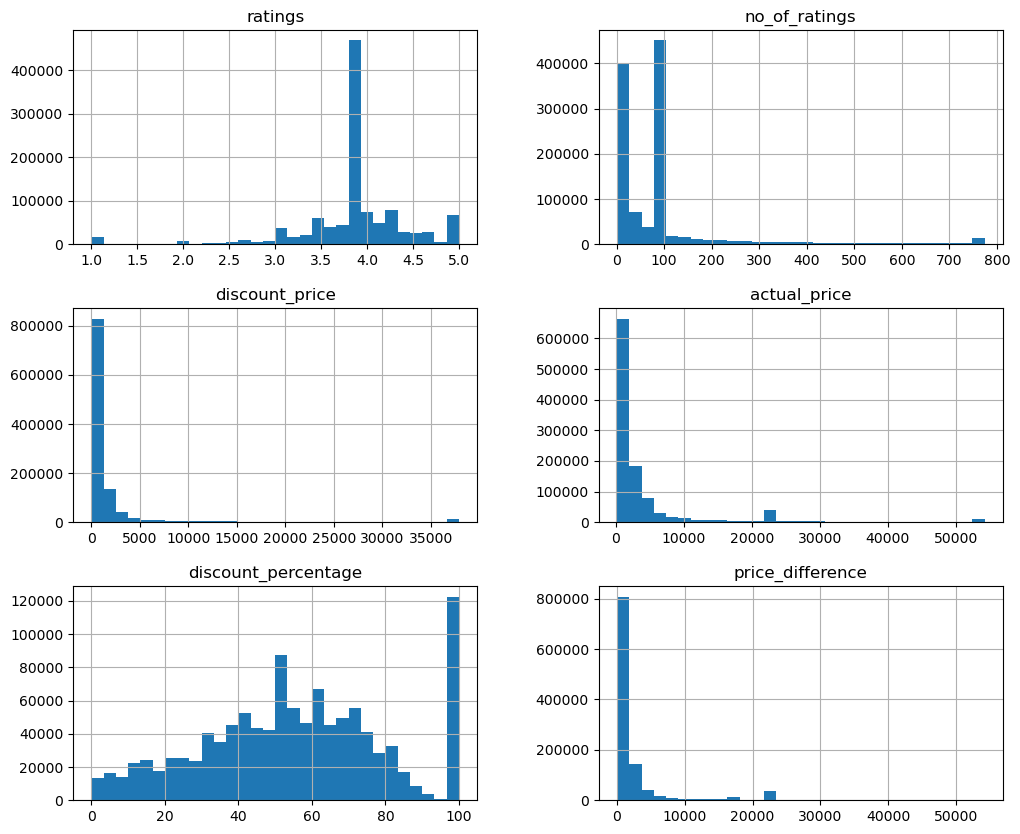

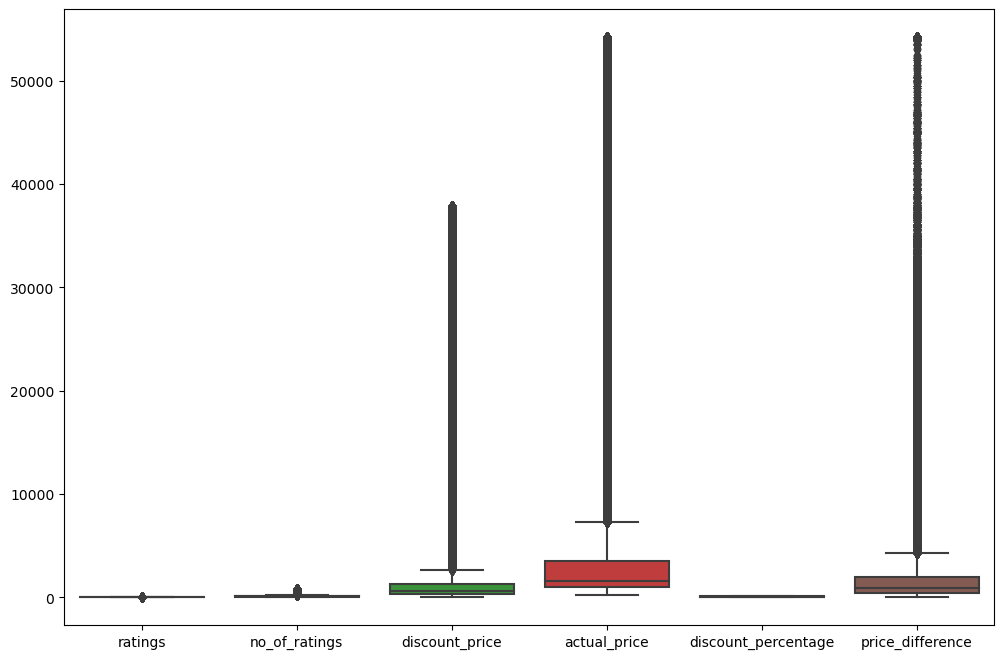

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical columns
numerical_cols = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_percentage', 'price_difference']
merge_df[numerical_cols].hist(bins=30, figsize=(12, 10))
plt.show()

# Boxplot for the same columns to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=merge_df[numerical_cols])
plt.show()


#### b. Categorical Variables:

For main_category and sub_category, use bar plots to understand the frequency distribution of the categories.


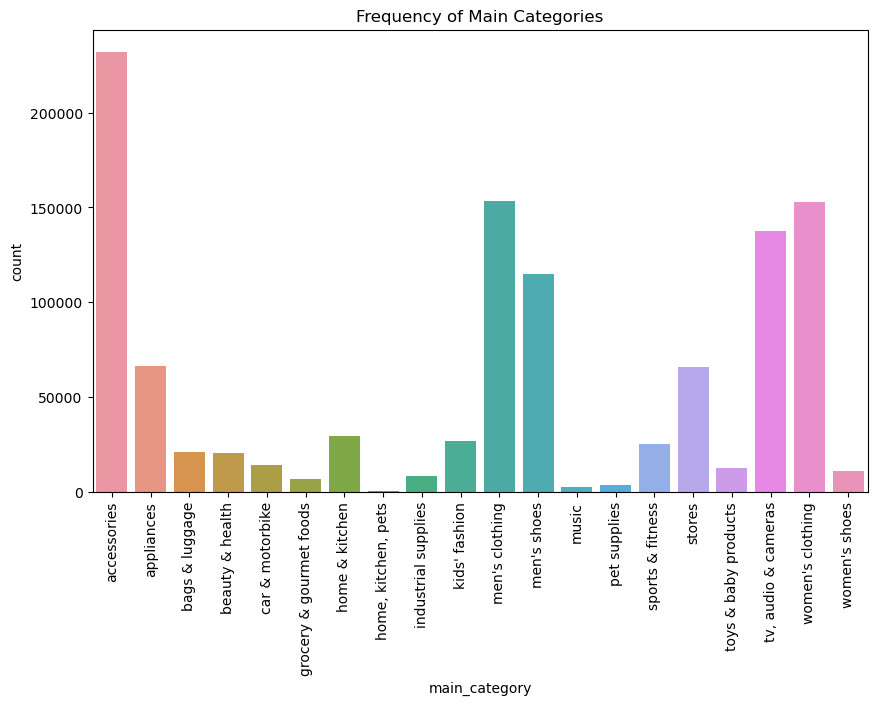

In [241]:
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Example: Frequency distribution of 'main_category'
plt.figure(figsize=(10, 6))
sns.countplot(data=merge_df, x='main_category')
plt.title("Frequency of Main Categories")
plt.xticks(rotation=90)
plt.show()


### 2. Bivariate Analysis (Relationships Between Features)

#### a. Correlation Matrix:

Visualize the correlation between numerical features to identify relationships and patterns.

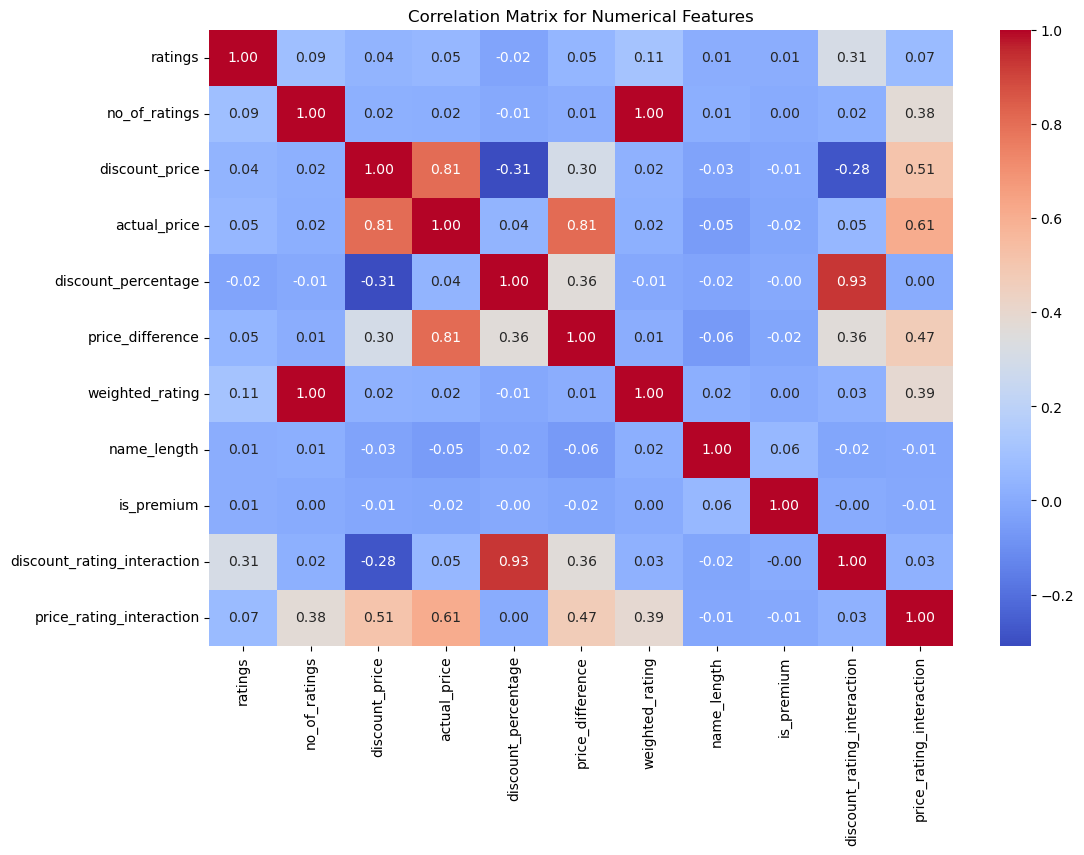

In [243]:
# Select only numerical columns for the correlation matrix
numerical_cols = merge_df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


#### b. Scatter Plots:
Explore relationships between key pairs of variables, such as discount_price vs. ratings or price_difference vs. no_of_ratings.

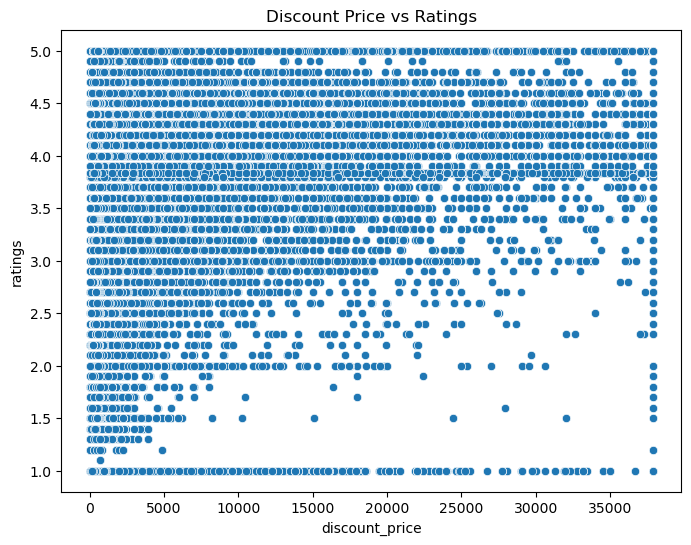

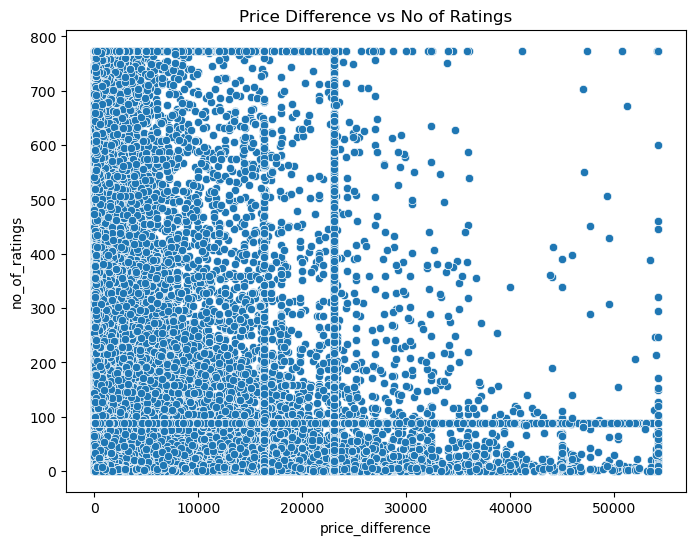

In [244]:
# Scatter plot for 'discount_price' vs 'ratings'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discount_price', y='ratings', data=merge_df)
plt.title("Discount Price vs Ratings")
plt.show()

# Scatter plot for 'price_difference' vs 'no_of_ratings'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_difference', y='no_of_ratings', data=merge_df)
plt.title("Price Difference vs No of Ratings")
plt.show()


#### c. Box Plots:

Use box plots to examine the relationship between categorical variables (e.g., main_category, sub_category) and numerical variables like ratings or discount_price.

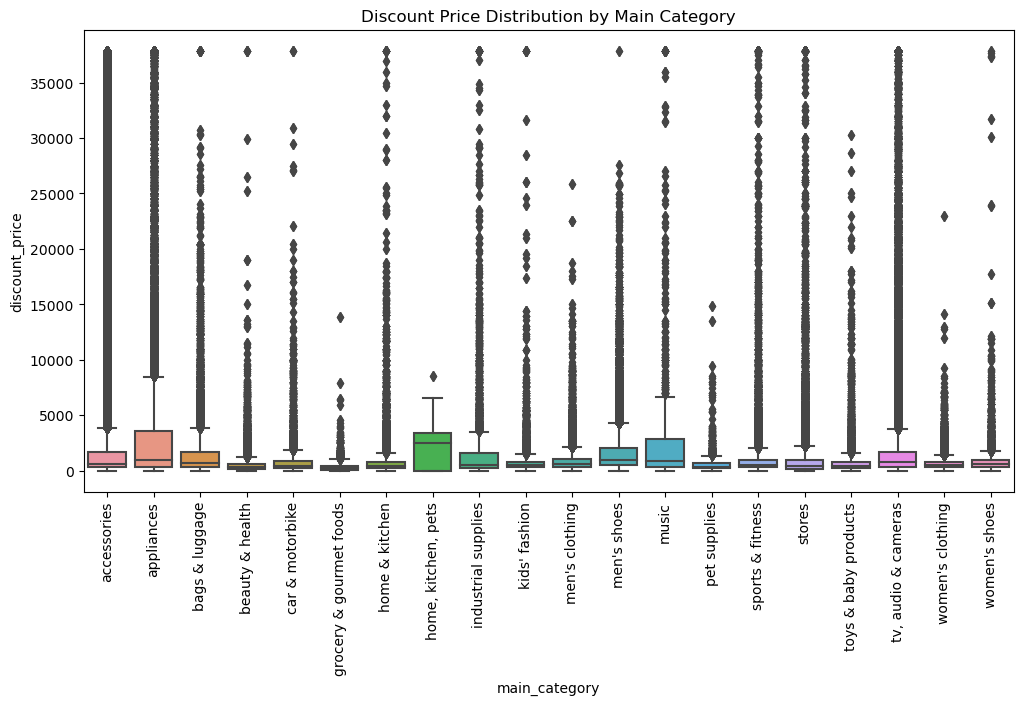

In [245]:
# Box plot for 'main_category' vs 'discount_price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='discount_price', data=merge_df)
plt.xticks(rotation=90)
plt.title("Discount Price Distribution by Main Category")
plt.show()


### 3. Multivariate Analysis (Exploring Multiple Features Together)

#### a. Pair Plot:
A pair plot will help visualize relationships between multiple numerical variables, which can be insightful for detecting patterns.

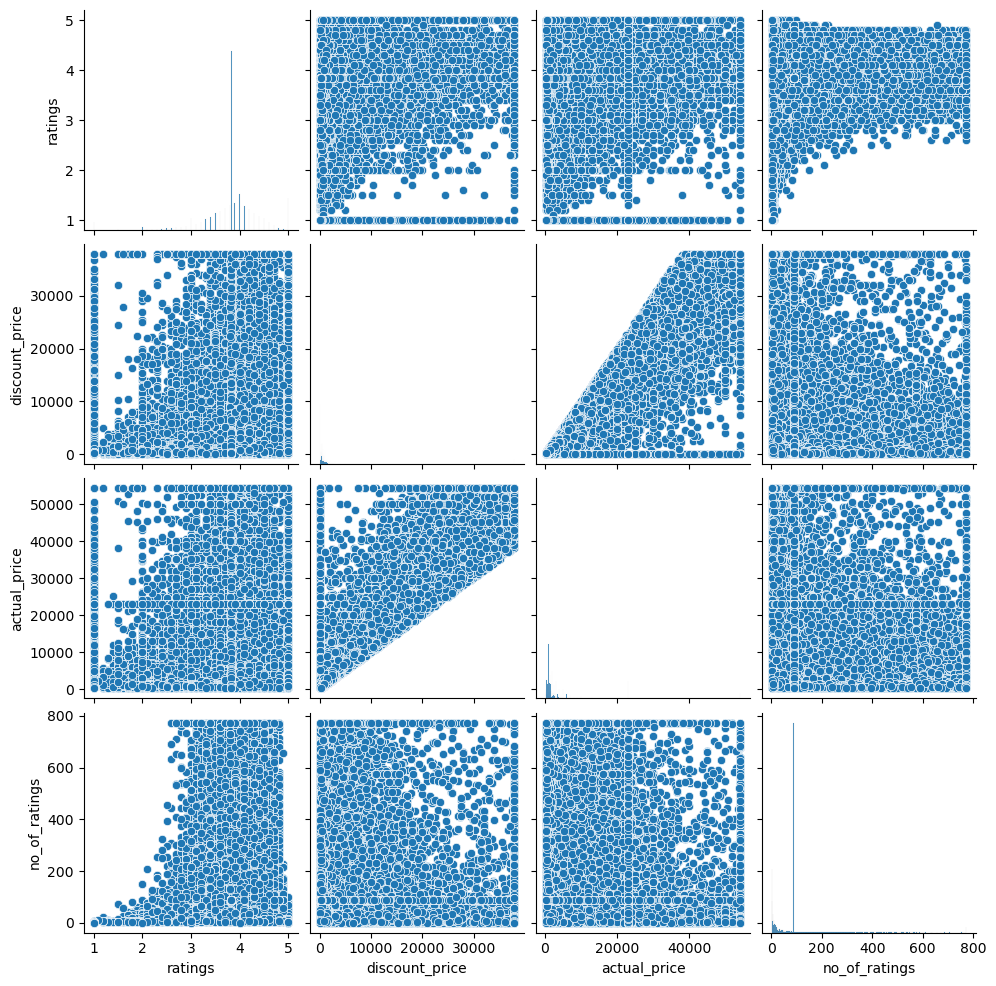

In [255]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
# Pair plot for selected numerical columns
sns.pairplot(merge_df[['ratings', 'discount_price', 'actual_price', 'no_of_ratings']])
plt.show()


#### b. Grouped Aggregation:

Group the data by categories (e.g., main_category, sub_category) and analyze aggregated metrics (e.g., mean, median) for numerical features.

In [247]:
# Group by 'main_category' and calculate average 'discount_price' and 'ratings'
category_grouped = merge_df.groupby('main_category').agg({'discount_price': 'mean', 'ratings': 'mean'}).reset_index()
print(category_grouped)


              main_category  discount_price   ratings
0               accessories     4050.558361  3.874047
1                appliances     4456.014068  3.839485
2            bags & luggage     1684.136059  3.870091
3           beauty & health      600.564596  3.961855
4           car & motorbike      875.393411  3.747661
5   grocery & gourmet foods      351.386670  4.051395
6            home & kitchen      869.550136  3.964460
7       home, kitchen, pets     2435.166667  3.251219
8       industrial supplies     1885.882405  3.837993
9             kids' fashion      702.984610  3.845825
10           men's clothing      802.727644  3.795805
11              men's shoes     1487.961524  3.734297
12                    music     3163.337220  3.936589
13             pet supplies      633.205679  4.003671
14         sports & fitness     1383.556180  3.813238
15                   stores     1013.515715  3.930411
16     toys & baby products      860.820069  3.999885
17      tv, audio & cameras 

### 4. Advanced Visualization:

#### a. Word Cloud for Product Names:

we can create a word cloud from the name column to visualize the most frequent words in product names.

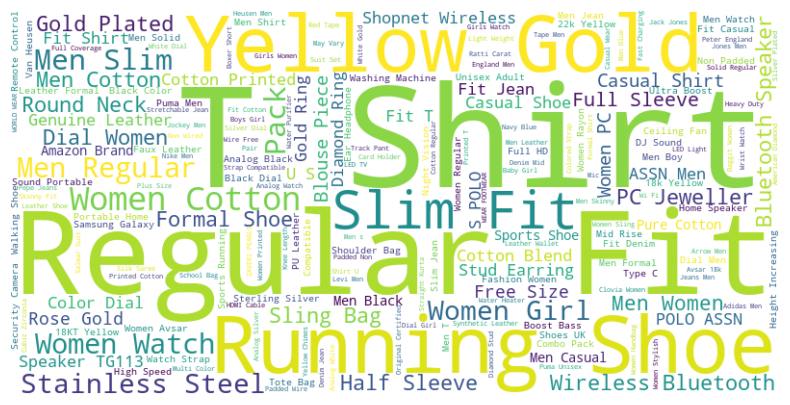

In [248]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(merge_df['name']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### b. Heatmap of Categories by Mean Ratings:

You can create a heatmap to visualize the mean ratings across different combinations of main_category and sub_category.

<Axes: xlabel='None-sub_category', ylabel='main_category'>

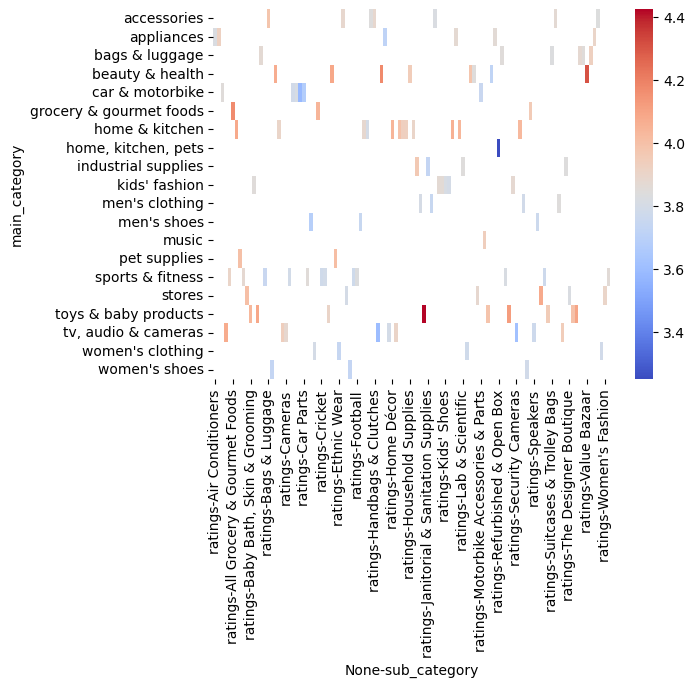

In [249]:
category_rating = merge_df.groupby(['main_category', 'sub_category']).agg({'ratings': 'mean'}).unstack()
sns.heatmap(category_rating, cmap='coolwarm', annot=False)


#### c. FacetGrid for Ratings Across Categories:

Using Seaborn’s FacetGrid, you can create multiple plots to see how ratings are distributed across different main_category values.


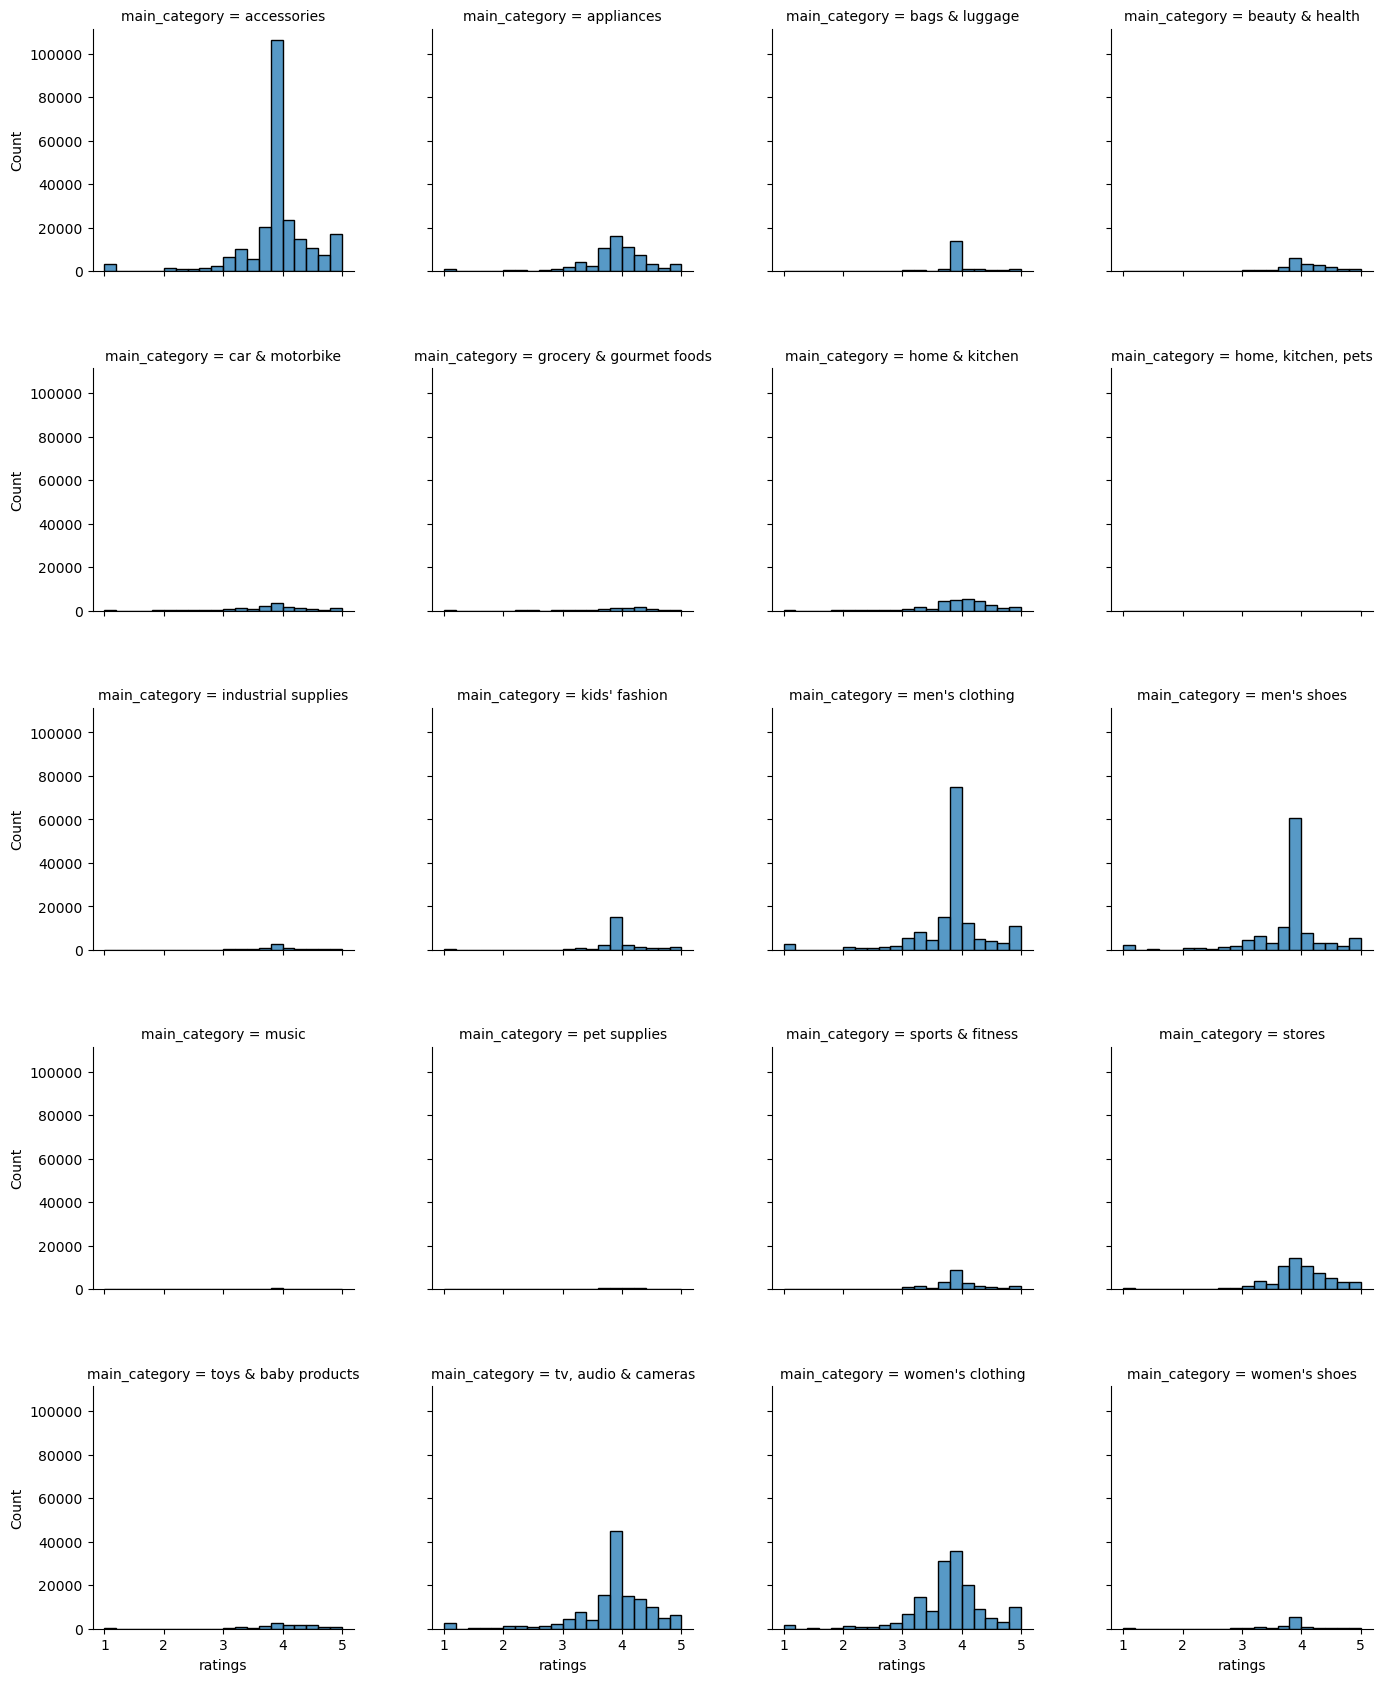

In [254]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
g = sns.FacetGrid(merge_df, col='main_category', col_wrap=4, height=4)
g.map(sns.histplot, 'ratings', bins=20)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.3)
plt.show()


#### d. Cluster Analysis for Pricing:

Use clustering techniques like K-Means to group products based on price-related features (discount_price, actual_price, etc.) and visualize the clusters.

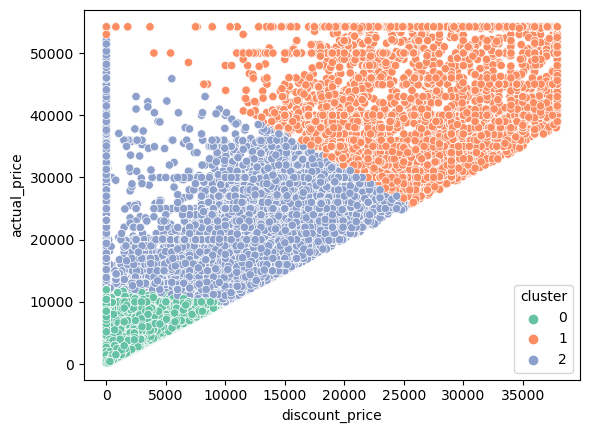

In [252]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
merge_df['cluster'] = kmeans.fit_predict(merge_df[['discount_price', 'actual_price']])
sns.scatterplot(data=merge_df, x='discount_price', y='actual_price', hue='cluster', palette='Set2')
plt.show()


# Insights from Dataset

### 1. What are the most popular categories based on the number of products?

**Visualization:** Frequency distribution of main_category.

**Insight:** The Accessories category dominates the dataset, followed by Men's Clothing and Women's Clothing. Categories like Music and Pet Supplies have significantly fewer products.

###  2. How are product prices distributed across categories?

**Visualization:** Box plot of discount_price by main_category.

**Insight:** While most categories have a lower price range, categories like Accessories, Men's Clothing, and Men's Shoes have a broader range of prices with significant outliers. Products in the TV, Audio & Cameras category tend to have higher prices compared to others.

### 3. What is the relationship between discount price and product ratings?

**Visualization:** Scatter plot of discount_price vs ratings.

**Insight:** The scatter plot shows that while products with higher discounts appear across a wide range of ratings, there is a clustering around a rating of 4. This suggests that even high-priced products with significant discounts can achieve high ratings, showing customer satisfaction isn’t directly tied to product cost.


### 4. How does price difference (between actual price and discount price) affect the number of ratings?

**Visualization:** Scatter plot of price_difference vs no_of_ratings.

**Insight:** There is no strong linear relationship between price difference and the number of ratings, but products with a higher price difference (i.e., those with higher discounts) tend to have more reviews. This suggests that heavily discounted products attract more customer attention and reviews.

### 5. Which categories receive the highest average ratings?

**Visualization:** Mean ratings per main_category.

**Insight:** Categories like Grocery & Gourmet Foods and Pet Supplies tend to have higher average ratings, suggesting that customers are more satisfied with products in these categories. In contrast, categories like Men's Shoes and Home, Kitchen, Pets receive slightly lower average ratings.


### 6. What is the correlation between different numerical features?

**Visualization:** Correlation matrix heatmap.

**Insight:** There is a strong positive correlation between discount_price and actual_price (0.81), as expected. However, interestingly, there’s no significant correlation between ratings and pricing variables like actual_price or discount_price, indicating that price may not directly influence customer satisfaction.

### 7. Which categories and subcategories have the highest product ratings?

**Visualization:** Heatmap showing the ratings across main_category and sub_category.

**Insight:** Certain subcategories like Air Conditioners, Grocery & Gourmet Foods, and Music have higher ratings compared to others, such as Footwear and TV & Audio Accessories.

### 8. What keywords are most frequent in product names?

**Visualization:** Word cloud for name column.

**Insight:** Common words in product names include Fit, T-Shirt, Regular, Running, and Shoe, indicating that fitness-related products and apparel are quite prevalent in the dataset.


###  9. How can this data inform a company’s discount strategy?

Products with larger price differences (higher discounts) tend to attract more customer reviews, indicating higher engagement. Companies could leverage this insight by applying targeted discounts to certain product categories to increase customer interaction and potentially boost sales.

### 10. Can we predict customer satisfaction (ratings) based on pricing features?

Based on the correlation analysis, price features like discount_price, actual_price, and price_difference have little to no correlation with product ratings. This suggests that factors other than price (like product quality, brand reputation, etc.) may drive customer satisfaction. A deeper dive using machine learning models could provide further insights into what truly impacts customer ratings.

### 11. Which categories should a company focus on improving based on data?

Categories like Home, Kitchen, Pets and Men’s Shoes have slightly lower average ratings compared to others. Companies could explore why products in these categories are underperforming and focus on quality improvement, customer feedback collection, and better targeting to enhance customer satisfaction.

### 12. What kind of predictive models could be built from this dataset?

Based on the available features, models predicting the likelihood of high customer ratings or the number of reviews based on product attributes (like price, discount percentage, and category) could be valuable for the business. Additionally, recommendation systems could be built using collaborative filtering or content-based methods to recommend products based on user ratings and past purchase behavior.


In [257]:
import pickle

# Save the DataFrame to a pickle file
with open('merge_df.pkl', 'wb') as f:
    pickle.dump(merge_df, f)

In [259]:

merge_df.to_parquet('merge_df.parquet', index=False)
